## Proyecto 2: Clasificación 
#### Aprendizaje Automatico

### SoftMax Regression: IRIS DATASET


#### Librerías

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from scipy.sparse import csr_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
import scipy.sparse
import seaborn as sns

### Dataset 
1. Se carga el data set de iris, X es el vector de features y y es la clase de cada flor. 
2. Se realiza el escalamiento para X
3. Los datos son ordenados aleatoriamente
4. Se seleccionan los datos de entrenamiento y de prueba
5. Se agrega la columna de 1's para cada vector de entrada

In [2]:
iris = datasets.load_iris()
X = iris["data"][::]
y = (iris["target"]).astype(int).reshape(len(iris.target),1)

In [3]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [4]:
def shuffleData(X, y):
    n = X.shape[1]
    data = np.c_[X, y]
    data = shuffle(data)
    
    return data[:,0:n], data[:,n:]

In [5]:
X_, y_ = shuffleData(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_,y_, test_size=0.3, random_state=55)

In [6]:
X_train = np.c_[np.ones((len(X_train),1)), X_train]
X_test = np.c_[np.ones((len(X_test),1)), X_test]

### Score   $s_k(x)=X^T\theta^{k}$
Cada clase tiene su propio parámetro $\theta^k$


def score_x(x, theta):
    score=[]
    for i in range(theta.shape[1]):
        score.append(x @(theta[:,i]))
    return score

In [7]:
def SCORE(x, theta): 
    score = x@theta
    return score

### Función softmax

#         $\hat{p_k}=\frac{\exp(s_k(x))}{\sum_{j=1}^{K}{\exp(s_j(x))}}$

def softmaxfunction(s): 
    return np.exp(s)/np.exp(s).sum()

In [8]:
def smf(s):
    return (np.exp(s.T) / np.sum(np.exp(s), axis=1)).T

### Función Costo y Gradiente

In [9]:
def oneHotIt(Y):
    m = Y.shape[0]
    Y = Y.ravel()
    OHX = scipy.sparse.csr_matrix((np.ones(m), (Y, np.array(range(m)))))
    OHX = np.array(OHX.todense()).T
    return OHX

##### Codificación One Hot para multiclase
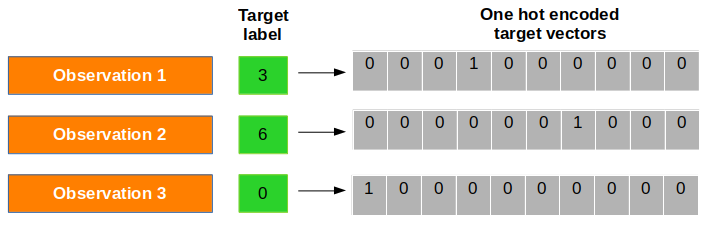

In [10]:
encoded = oneHotIt(y_train[4:7].astype(int))
print('Codificación One Hot para las clases\n', encoded)
print('Clasificación de clases\n', y_train[4:7])


Codificación One Hot para las clases
 [[0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]
Clasificación de clases
 [[1.]
 [2.]
 [1.]]


In [11]:
def costo(theta,x,y,lam):
    m = x.shape[0] 
    y_mat = oneHotIt(y) 
    scores = SCORE(x,theta) 
    prob = smf(scores) 
    loss = (-1 / m) * np.sum(y_mat * np.log(prob)) 
    grad = (-1 / m) * (x.T @ (y_mat - prob)) 
    return loss,grad

In [12]:
def getProbsAndPreds(someX):
    probs = smf(SCORE(someX, theta))
    preds = np.argmax(probs,axis=1)
    return probs,preds

### Entrenamiento del modelo
* $\eta$ = 0.85
* iteraciones = 5000
* Método: Gradient Descent

In [13]:
theta = np.random.rand(X_train.shape[1],len(np.unique(y_train)))
print ('Vector de pesos iniciales: \n',  theta)

Vector de pesos iniciales: 
 [[0.55568097 0.895175   0.68748607]
 [0.68713327 0.15672929 0.74018374]
 [0.79851078 0.15450062 0.59926573]
 [0.40526782 0.28813503 0.62639724]
 [0.27524326 0.64376112 0.95096335]]


In [14]:
eta = 0.85
n_epochs= 5000

J = []
for i in range(0,n_epochs):
    loss,grad = costo(theta,X_train,y_train.astype(int),1)
    J.append(loss)
    theta = theta - (eta * grad)
print ('Costo final: ', loss)

Costo final:  0.02494208996677771


In [15]:
print ('El mejor vector de pesos de acuerdo al entrenamiento:\n', theta)

El mejor vector de pesos de acuerdo al entrenamiento:
 [[ 0.66470353  8.28507848 -6.81143997]
 [-2.4135257   3.49821637  0.49935562]
 [ 3.53363066  0.23267275 -2.21402627]
 [-5.68758588 -2.58278952  9.59017549]
 [-5.24971439 -2.18022355  9.29990567]]


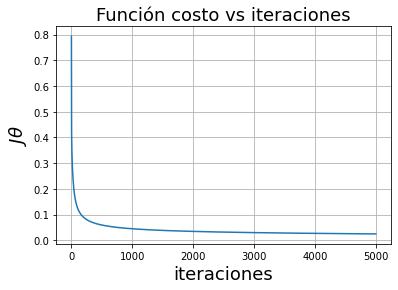

In [16]:
plt.title('Función costo vs iteraciones', fontsize=18)
plt.ylabel(r'$J\theta$', fontsize=18)
plt.xlabel('iteraciones', fontsize=18)
plt.grid()
plt.plot(J)
plt.show()

## Predicciones
Predicciones para los datos de prueba

In [17]:
prob,y_pred = getProbsAndPreds(X_test)

In [18]:
y_pred

array([2, 2, 2, 0, 1, 1, 0, 1, 0, 2, 0, 2, 1, 2, 2, 1, 0, 1, 2, 0, 2, 1,
       1, 0, 2, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 2, 1, 1, 2, 2, 0, 0, 2, 0,
       2], dtype=int32)

In [19]:
y_test.ravel()

array([2., 1., 2., 0., 1., 1., 0., 1., 0., 2., 0., 2., 1., 2., 2., 1., 0.,
       1., 2., 0., 2., 2., 1., 0., 2., 1., 0., 1., 1., 1., 1., 0., 0., 0.,
       1., 2., 1., 1., 2., 2., 0., 0., 2., 0., 2.])

In [20]:
print(y_pred[:6].reshape(-1,1))
print(y_test[:6])

[[2]
 [2]
 [2]
 [0]
 [1]
 [1]]
[[2.]
 [1.]
 [2.]
 [0.]
 [1.]
 [1.]]


### Calculo del error y análisis de resultados

In [21]:
def error(original_target, predict_target):
    counter = 0.0
    for i in range(len(original_target)):
        if original_target[i] != predict_target[i]:
            counter += 1
            
    return counter/len(original_target)

In [22]:
ex = (error(y_test, y_pred))

In [23]:
print("% Acierto: ", (1-ex)*100)
print("% Error :", ex*100)

% Acierto:  95.55555555555556
% Error : 4.444444444444445


In [24]:
cm = confusion_matrix(y_test , y_pred)
cm

array([[14,  0,  0],
       [ 0, 15,  1],
       [ 0,  1, 14]], dtype=int64)

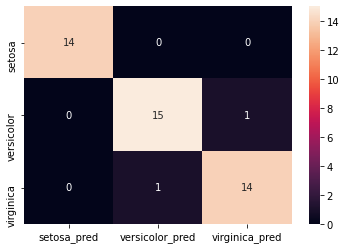

In [25]:
y_axis_labels = iris["target_names"]
x_axis_labels = ['setosa_pred', 'versicolor_pred', 'virginica_pred']
cm = confusion_matrix(y_test , y_pred)
f = sns.heatmap(cm, annot=True,  xticklabels=x_axis_labels, yticklabels=y_axis_labels)

In [26]:
print(classification_report(y_test, y_pred, target_names= iris["target_names"]))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       0.94      0.94      0.94        16
   virginica       0.93      0.93      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [27]:
prob,y_pred = getProbsAndPreds(X_test[5:8])
print('Probabilidades:\n', prob)
print('\nsuma de probabilidades:',np.sum(prob, axis=1))
print('\nCLASE PREDECIDA: ', y_pred)
print('CLASE ORIGINAL:',y_test[5:8].ravel())

Probabilidades:
 [[2.08725838e-06 9.99679619e-01 3.18294131e-04]
 [9.99683043e-01 3.16957484e-04 4.80603492e-24]
 [1.43084332e-04 9.85260461e-01 1.45964551e-02]]

suma de probabilidades: [1. 1. 1.]

CLASE PREDECIDA:  [1 0 1]
CLASE ORIGINAL: [1. 0. 1.]
